In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import AdaBoostClassifier, IsolationForest
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs, load_digits
from sklearn.metrics import silhouette_score, classification_report
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import train_test_split, HalvingGridSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Problem1

In [2]:
df = load_digits()
X = pd.DataFrame(df["data"])
y = df["target"]

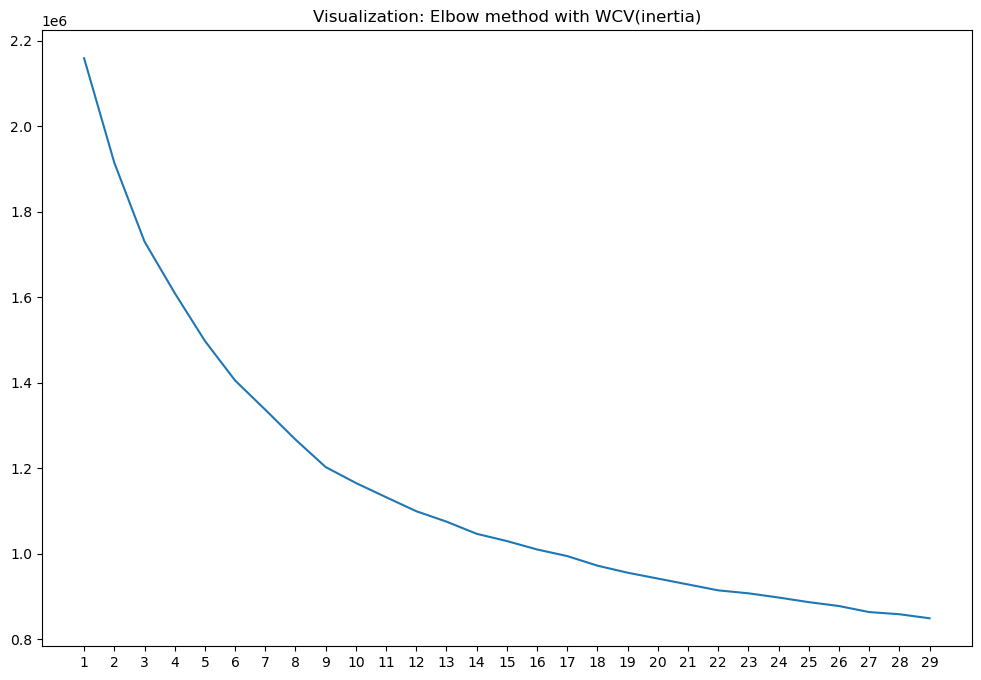

In [3]:
wcv_list = []
for k in np.arange(1, 30):
    mod_cluster = KMeans(n_clusters = k)
    groups = mod_cluster.fit(X)
    wcv_list.append(groups.inertia_)

plt.figure(figsize=(12,8))
plt.plot(np.arange(1, 30), wcv_list)
plt.xticks(np.arange(1, 30))
plt.title("Visualization: Elbow method with WCV(inertia)")
plt.show()

### Comment: The elbow method is inconclusive for determining the optimal 'K' in K-means clustering for the high-dimensional digits dataset; alternative methods like silhouette score may help.

# Problem 2

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

X = StandardScaler().fit_transform(X)
eps_values = np.arange(0.5, 10.0, 0.5)
min_samples_values = range(12,30)


best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        pred_labels = db.fit_predict(X)

        # Exclude cases when number of clusters is 1 or less (silhouette score is not defined in such cases)
        if len(set(pred_labels)) > 1: 
            # Calculate silhouette score
            score = silhouette_score(X, pred_labels)

            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

if best_params:
    print(f"Best parameters = {best_params}, with silhouette score = {best_score}")
else:
    print("No suitable parameters found. Try changing the range of eps and min_samples values.")


Best parameters = {'eps': 9.5, 'min_samples': 12}, with silhouette score = 0.6201042551808639


### So we can see that the epsilion has the optimal value 9.5 and min_samples has the optimal value 12, and the sillhouette score is 0.62.

### The hyperparameter tuning uses grid search to optimize DBSCAN's 'eps' and 'min_samples', selecting the combination with the highest silhouette score for best clustering.

# Problem3

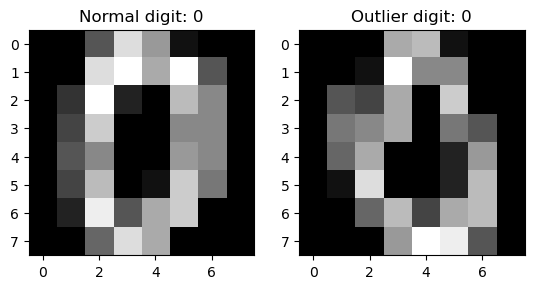

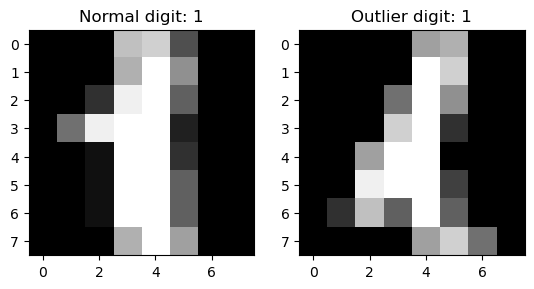

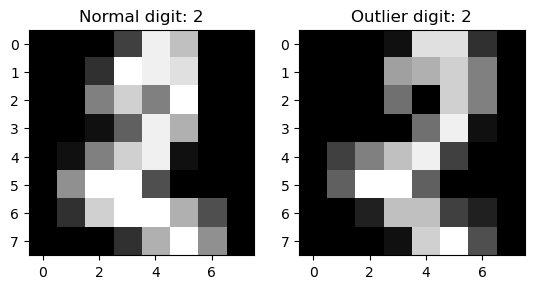

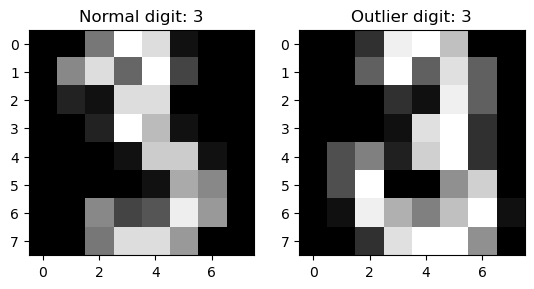

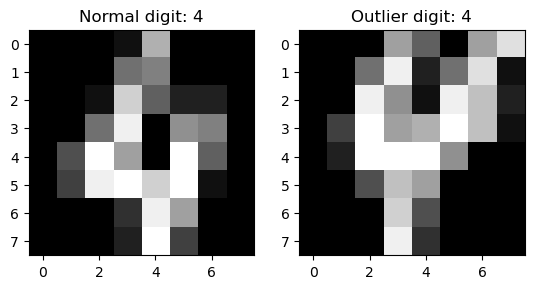

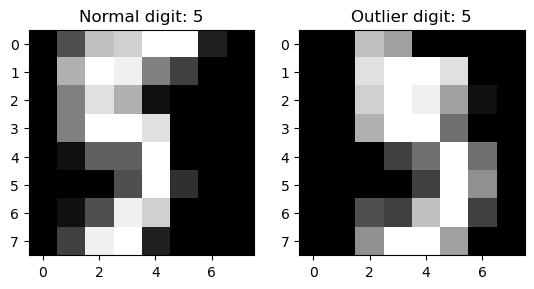

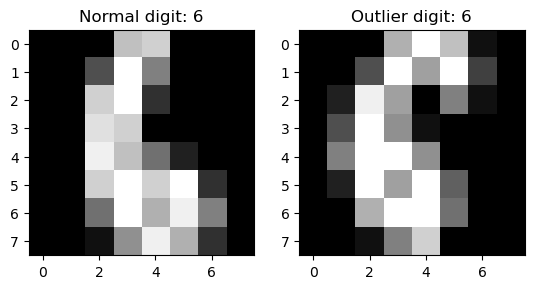

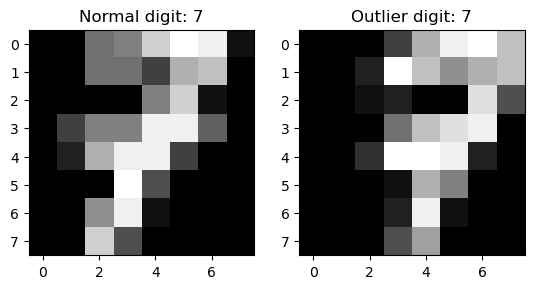

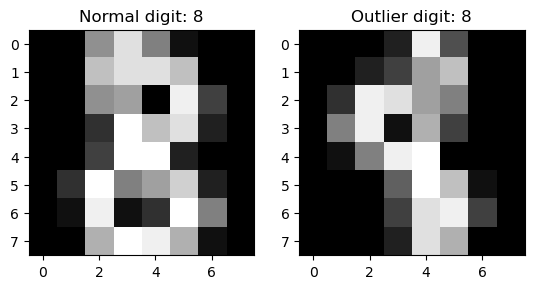

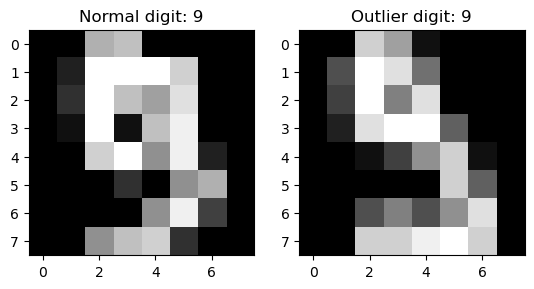

In [6]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
lof = LocalOutlierFactor(contamination=0.0199)

for i in range(10):
    X_i = X[y == i]
    y_pred = lof.fit_predict(X_i)
    
    # Select normal and outlier samples
    normal_samples = X_i[y_pred == 1]
    outlier_samples = X_i[y_pred == -1]

    if len(normal_samples) > 0 and len(outlier_samples) > 0:
        fig, axs = plt.subplots(1, 2)

        # Normal digit
        axs[0].imshow(normal_samples[0].reshape(8,8), cmap=plt.cm.gray)
        axs[0].set_title(f"Normal digit: {i}")

        # Outlier digit
        axs[1].imshow(outlier_samples[0].reshape(8,8), cmap=plt.cm.gray)
        axs[1].set_title(f"Outlier digit: {i}")
        plt.show()

### Using a contamination parameter of 0.0199 and Local Outlier Factor, we identified outlier digits in our dataset, with most showing visually convincing differences.

# Problem IV. (score = 25) Apply PCA to X. How to find the correct number of components?

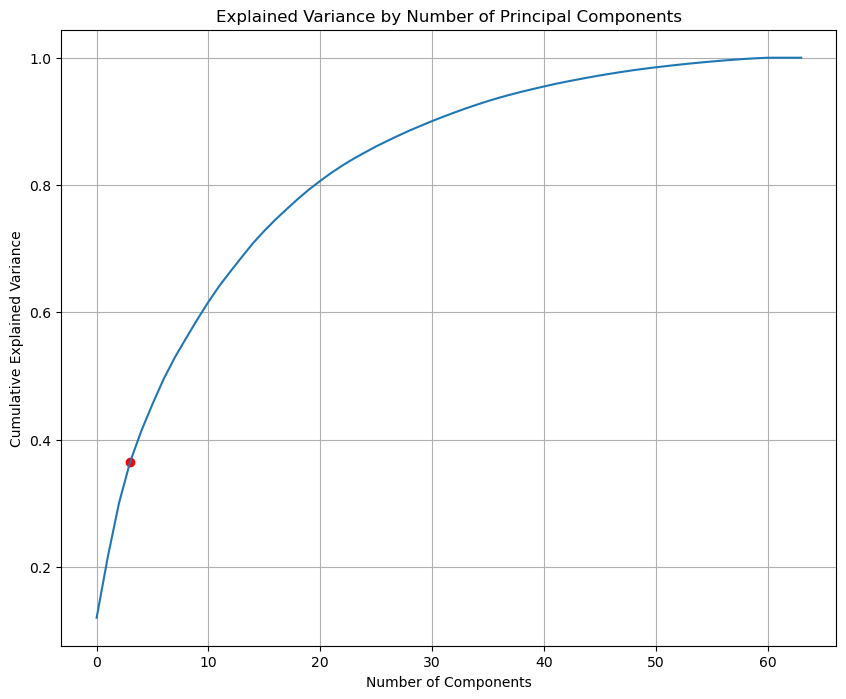

The optimal number of components is approximately: 3


In [7]:
X = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)
explained_variance_change = np.diff(cumulative_variance)


drop_factor = 0.05
elbow_point = np.where(explained_variance_change < drop_factor)[0][0]


plt.figure(figsize=(10, 8))
plt.plot(range(len(cumulative_variance)), cumulative_variance)
plt.scatter(elbow_point, cumulative_variance[elbow_point], color='red')  
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

print(f"The optimal number of components is approximately: {elbow_point}")

###  I employed PCA on standardized data and analyzed the explained variance ratio. Setting a 5% drop factor, I identified an elbow point at 3 components, suggesting this is the optimal number.